## Download data from kaggle

In [ ]:
from google.colab import files
files.upload()
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # set permission

Saving kaggle.json to kaggle.json
     |████████████████████████████████| 58 kB 2.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=21a8da6e9f8ed6a50cac8606e4652b11fce83f5219f1222db0518774aae873bc
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle datasets download -d 'rdoume/beerreviews'  -p '/content'
!unzip -q '/content/beerreviews.zip' -d '/content'

 62% 17.0M/27.4M [00:01<00:00, 13.7MB/s]
100% 27.4M/27.4M [00:01<00:00, 17.6MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly as py

In [ ]:
df = pd.read_csv('/content/beer_reviews.csv')

In [ ]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


## Clean data

In [ ]:
# check for duplicated
df.duplicated().sum()

0

In [ ]:
# check null value
df.isna().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [ ]:
# drop all null value
df = df.dropna()

In [ ]:
# convert review_time to data_time
df['review_time'] = pd.to_datetime(df['review_time'], unit='s')

In [ ]:
print(df['review_time'].min())
print(df['review_time'].max())

1996-08-22 00:00:01
2012-01-11 12:35:48


In [ ]:
df['year'] = df['review_time'].dt.year

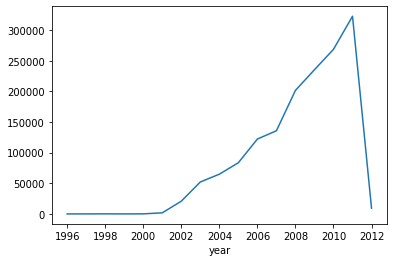

In [ ]:
df.groupby('year')['review_time'].count().plot()

In [ ]:
# Cause we has not many data before 2002, so I will delete all these data
df = df[df['year']> 2001]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516501 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1516501 non-null  int64         
 1   brewery_name        1516501 non-null  object        
 2   review_time         1516501 non-null  datetime64[ns]
 3   review_overall      1516501 non-null  float64       
 4   review_aroma        1516501 non-null  float64       
 5   review_appearance   1516501 non-null  float64       
 6   review_profilename  1516501 non-null  object        
 7   beer_style          1516501 non-null  object        
 8   review_palate       1516501 non-null  float64       
 9   review_taste        1516501 non-null  float64       
 10  beer_name           1516501 non-null  object        
 11  beer_abv            1516501 non-null  float64       
 12  beer_beerid         1516501 non-null  int64         
 13  year        

## Question:
- Which brewery produces the strongest beers by ABV%?
- If you had to pick 3 beers to recommend using only this data, which would you pick?
- Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
- Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?


### Question 1: Which brewery produces the strongest beers by ABV%?

In [ ]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,year
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,2009
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2009
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2009
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2009
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2010


In [ ]:
df[df['beer_abv'] == df['beer_abv'].max()][['brewery_id','brewery_name']]

,brewery_id,brewery_name
12919,6513,Schorschbräu


In [ ]:
df[['brewery_id','brewery_name','beer_abv']].sort_values('beer_abv', ascending = False).head(10)

,brewery_id,brewery_name,beer_abv
12919,6513,Schorschbräu,57.7
12939,6513,Schorschbräu,43.0
12940,6513,Schorschbräu,43.0
746395,16315,BrewDog,41.0
746387,16315,BrewDog,41.0
746397,16315,BrewDog,41.0
746396,16315,BrewDog,41.0
746394,16315,BrewDog,41.0
746393,16315,BrewDog,41.0
746392,16315,BrewDog,41.0


- Brewery produces the strongest beers by ABV% is **Schorschbräu** with 3 product
- Brewery produces the second strongest beers by ABV% is **BrewDog**

#### **Schor**

In [ ]:
Schor = df[df['brewery_id'] == 6513]

In [ ]:
Schor.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,year
12909,6513,Schorschbräu,2006-10-04 16:29:49,3.5,3.5,4.0,Bierman9,Munich Dunkel Lager,3.5,3.5,Schorschbräu Dunkles,4.9,32973,2006
12910,6513,Schorschbräu,2011-09-22 17:05:23,3.5,3.5,4.0,skypup,Eisbock,2.5,2.5,Schorschbock Ice 13,13.0,73357,2011
12911,6513,Schorschbräu,2010-09-07 17:34:17,4.0,3.5,3.0,hotzenklotz,Doppelbock,3.5,4.0,Schorschbock,16.0,47421,2010
12912,6513,Schorschbräu,2010-01-08 21:07:26,3.5,3.0,3.0,Absumaster,Doppelbock,3.0,3.5,Schorschbock,16.0,47421,2010
12913,6513,Schorschbräu,2009-10-23 06:30:22,4.0,3.5,3.0,Namako,Doppelbock,3.0,4.0,Schorschbock,16.0,47421,2009


In [ ]:
Schor_abv = Schor.groupby('beer_abv')['brewery_id'].count().reset_index()

In [ ]:
Schor_abv

,beer_abv,brewery_id
0,4.90,1
1,13.00,20
2,16.00,6
3,30.86,1
4,39.44,3
5,43.00,2
6,57.70,1


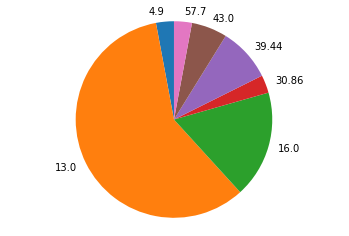

In [ ]:
# Schorschbräu have 34 products of beer and more than 50% of them have abv is 13. Almost 97% beer of Schorschbräu have abv more than the average 7.
fig1, ax1 = plt.subplots()
ax1.pie(Schor_abv['brewery_id'], labels= Schor_abv['beer_abv'], startangle= 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### **BrewDog**

In [ ]:
BD = df[df['brewery_id'] == 16315]

In [ ]:
BD_abv = BD.groupby('beer_abv')['brewery_id'].count().reset_index().sort_values('brewery_id', ascending = False)

In [ ]:
BD_abv 

,beer_abv,brewery_id
28,10.00,680
21,8.60,411
12,6.00,368
24,9.00,329
18,8.00,314
8,5.00,228
17,7.80,203
27,9.50,195
40,18.20,184
35,12.50,138


### Question 2: If you had to pick 3 beers to recommend using only this data, which would you pick?

In [ ]:
beer = df.groupby(['beer_beerid','beer_name'])[['review_overall','review_aroma','review_appearance','review_palate','review_taste','brewery_name','beer_abv']].agg({
    'review_overall': 'mean',
    'review_aroma': 'mean',
    'review_appearance': 'mean',
    'review_palate': 'mean',
    'review_taste': 'mean',
    'brewery_name': 'count',
    'beer_abv': 'mean'
}).reset_index()

In [ ]:
beer = beer.sort_values(by = ['brewery_name'],
                        ascending = False)

In [ ]:
beer['review_score'] = (beer['review_aroma'] + beer['review_appearance'] + beer['review_palate'] + beer['review_taste'])/4

In [ ]:
beer.rename(columns = {'brewery_name': 'number_review'}, inplace = True)

In [ ]:
beer

,beer_beerid,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,number_review,beer_abv,review_score
1364,2093,90 Minute IPA,4.145529,4.213504,4.192214,4.181265,4.326034,3288,9.0,4.228254
295,412,Old Rasputin Russian Imperial Stout,4.172748,4.197288,4.373587,4.231353,4.340006,3097,9.0,4.285559
1243,1904,Sierra Nevada Celebration Ale,4.166778,4.081547,4.224213,4.073342,4.186872,2986,6.8,4.141494
701,1093,Two Hearted Ale,4.329971,4.266324,4.153888,4.138665,4.319149,2726,7.0,4.219507
2580,4083,Stone Ruination IPA,4.161547,4.341229,4.178942,4.183383,4.351036,2702,7.7,4.263647
...,...,...,...,...,...,...,...,...,...,...
14764,26099,Navideña,4.000000,4.000000,4.500000,4.000000,4.000000,1,5.0,4.125000
14767,26104,Runöl Mörk Lager,3.000000,3.500000,4.000000,3.500000,3.500000,1,5.0,3.625000
14778,26115,Bear Paw Burton Ale,3.500000,2.500000,4.000000,3.000000,3.500000,1,6.5,3.250000
34399,56735,Prae&#269;ka Christmas,3.500000,3.000000,4.000000,3.500000,3.500000,1,5.8,3.500000


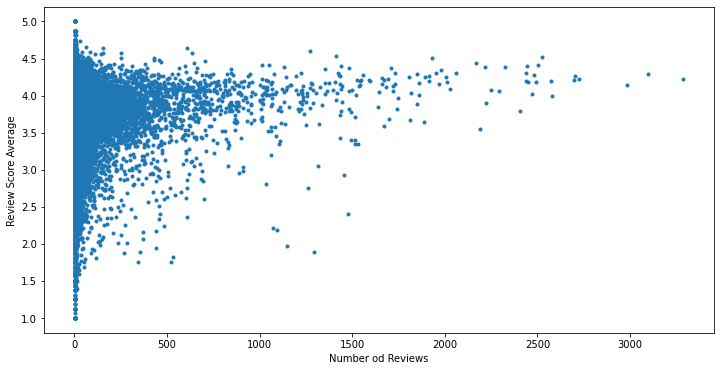

In [ ]:
# Scatter plot of Review score and Number of Review
# As we can see that higher number of reviews might be higher review score average
plt.figure( figsize = (12,6))
plt.scatter( beer['number_review'], beer['review_score'], marker ='.')
plt.xlabel( 'Number od Reviews' )
plt.ylabel( 'Review Score Average' )
plt.show()

In [ ]:
recommend = beer[(beer['number_review'] > 2500)].sort_values(by = ['review_score'], ascending = False).head(3)

In [ ]:
recommend

,beer_beerid,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,number_review,beer_abv,review_score
4684,7971,Pliny The Elder,4.590028,4.612188,4.388603,4.451326,4.630985,2527,8.0,4.520776
6668,11757,Founders Breakfast Stout,4.354658,4.412035,4.364454,4.388045,4.501200,2501,8.3,4.416433
295,412,Old Rasputin Russian Imperial Stout,4.172748,4.197288,4.373587,4.231353,4.340006,3097,9.0,4.285559


I choose to recommend beer with the review number is more than 2500 (so that review score is quite fair) and review score (average of aroma, appearance, palete, taste) is as high as possile. And 3 beer I reccomend is Pliny The Elder, Founders Breakfast Stout, Old Rasputin Russian Imperial Stout. As you can see from table below: these three beer come from three different company however all of them are darker in color, more bitter, and have a higher ABV than typical American IPA (all beer have abv from 8 to 9)

In [ ]:
company_beer_name = pd.merge(recommend['beer_name'], df[['beer_name', 'brewery_name','beer_style']], how = 'left', on = 'beer_name')

In [ ]:
company_beer_name.drop_duplicates(subset ="beer_name",
                                  keep = 'first',
                                  inplace = True)

In [ ]:
company_beer_name

,beer_name,brewery_name,beer_style
0,Pliny The Elder,Russian River Brewing Company,American Double / Imperial IPA
2527,Founders Breakfast Stout,Founders Brewing Company,American Double / Imperial Stout
5028,Old Rasputin Russian Imperial Stout,North Coast Brewing Co.,Russian Imperial Stout


### Question 3: Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

In [ ]:
df[['review_overall','review_aroma','review_appearance','review_palate','review_taste']].corr().style.background_gradient(cmap='Reds')

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.612414,0.498001,0.698692,0.786965
review_aroma,0.612414,1.000000,0.558705,0.614554,0.714572
review_appearance,0.498001,0.558705,1.000000,0.564222,0.544211
review_palate,0.698692,0.614554,0.564222,1.000000,0.731947
review_taste,0.786965,0.714572,0.544211,0.731947,1.000000


All of these review correlate to overall review. With 0.79 coefficent, taste seem to be the most important feature that affects overall review. The impact can be arranged in a descending order as: Taste (0.79) > Palate (0.70) > Aroma (0.62) > Appearance (0.50).

In [ ]:
beer[['review_overall','review_aroma','review_appearance','review_palate','review_taste']].corr().style.background_gradient(cmap='Reds')

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.760814,0.638924,0.818582,0.879117
review_aroma,0.760814,1.000000,0.663368,0.743769,0.819921
review_appearance,0.638924,0.663368,1.000000,0.681546,0.661613
review_palate,0.818582,0.743769,0.681546,1.000000,0.830110
review_taste,0.879117,0.819921,0.661613,0.830110,1.000000


When using beer table (df table group by beer_id with all review is the average of that review), we can see more clearly the relationship between review_overall and 4 review left with descending order as: Taste (0.88) > Palate (0.82) > Aroma (0.76) > Appearance (0.64) (the same order as df table)

There's so understadable that appearance have lowest correlation, as people said: "Don't judge the book by its cover", especially for the product that you can taste.

### Question 4: Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In [ ]:
aro_appear = pd.pivot_table(df[['beer_style','beer_name','review_aroma', 'review_appearance']],
                            index="beer_style",
                            aggfunc= {'beer_name': 'count', 'review_aroma': 'mean', 'review_appearance': 'mean'}).reset_index()

In [ ]:
aro_appear.rename(columns = {'beer_name': 'number_of_review'}, inplace = True)

In [ ]:
aro_appear

,beer_style,number_of_review,review_appearance,review_aroma
0,Altbier,7208,3.815552,3.634850
1,American Adjunct Lager,28847,2.786754,2.479599
2,American Amber / Red Ale,41662,3.829425,3.653353
3,American Amber / Red Lager,8586,3.534125,3.220533
4,American Barleywine,26254,4.040337,4.022187
...,...,...,...,...
99,Vienna Lager,8306,3.706417,3.440826
100,Weizenbock,9244,4.012927,4.049113
101,Wheatwine,3598,3.907865,3.976793
102,Winter Warmer,19932,3.844195,3.705373


In [ ]:
aro_appear['aroma_appear_mean'] = (aro_appear['review_appearance'] + aro_appear['review_aroma']) / 2

In [ ]:
aro_appear['diff_from_mean'] = abs(aro_appear['review_appearance'] - aro_appear['review_aroma'])

In [ ]:
sort_aro_appear = aro_appear.sort_values('aroma_appear_mean', ascending=False).head(5)

In [ ]:
sort_aro_appear

,beer_style,number_of_review,review_appearance,review_aroma,aroma_appear_mean,diff_from_mean
11,American Double / Imperial Stout,50128,4.164220,4.161467,4.162843,0.002753
89,Russian Imperial Stout,53377,4.212648,4.077618,4.145133,0.135030
86,Quadrupel (Quad),17930,4.119604,4.133352,4.126478,0.013748
9,American Double / Imperial IPA,85097,4.080555,4.099974,4.090265,0.019419
63,Gueuze,5919,4.037844,4.116320,4.077082,0.078476


In [ ]:
p1 = go.Scatter(
    x = sort_aro_appear['aroma_appear_mean'],
    y = sort_aro_appear['beer_style'],
    error_x = dict(
        type='data',
        array=sort_aro_appear['diff_from_mean']/2,
        thickness=1.5),
    mode = 'markers',
    name = 'Combined Average',
    marker=dict(
        color='rgba(84, 110, 122, 0.95)',
        line=dict(
            color='rgba(84, 110, 122, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Aroma Rating Dot Plot 
p2 = go.Scatter(
    x = sort_aro_appear['review_aroma'],
    y = sort_aro_appear['beer_style'],
    mode = 'markers',
    name = 'Aroma Average',
    marker=dict(
        color='rgba(229, 57, 53, 0.95)',
        line=dict(
            color='rgba(229, 57, 53, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)

# Appearance Rating Dot Plot
p3 = go.Scatter(
    x = sort_aro_appear['review_appearance'],
    y = sort_aro_appear['beer_style'],
    mode = 'markers',
    name = 'Appearance Average',
    marker=dict(
        color='rgb(1, 87, 155, 0.95)',
        line=dict(
            color='rgba(1, 87, 155, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=8
    )
)


# Set layout
layout= dict(
    title='Top 5 Beer Styles by Combined Appearance/Aroma Average',
    xaxis=dict(
        showline=True,
        showticklabels=True,
        ticks='outside',
        title='Rating',
        hoverformat = '.2f',
        autorange=True,
        showgrid=False,),
    margin = dict(l = 250),
    font=dict(family='Courier New, monospace', color='dark gray'),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='bottom',
        xanchor='right',
    ),
    hovermode='closest'
)


# Plot it
fig = go.Figure(data=[p1,p2,p3], layout=layout)
py.offline.iplot(fig)